In [29]:
import glob
import csv
import pandas as pd
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import *
from keras.callbacks import *

In [2]:
#Summing all the csv files and just meaning by subgroup defined by name
#SumTable = pd.read_csv('data/tour_1_result_0.csv')
list_ = []
for file in glob.glob('data/tour*result*.csv'):
    table = pd.read_csv(file)
    list_.append(table)
SumTable = pd.concat(list_, ignore_index=True)
AvgTable = SumTable.groupby('Name').mean()


AvgTable['present'] = 0  # make new column

AvgTable.sort_values(['Rank'])

,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate,present
Name,,,,,,,,,,,,,,
Evolved HMM 5,1.200480,2.841197,0.751156,4.697362,1.000000,0.697511,0.053645,0.124955,0.123889,0.998325,0.522507,0.051792,0.218408,0
Evolved FSM 16,1.336192,2.845268,0.746335,6.269052,1.000000,0.653651,0.092684,0.157662,0.096003,0.863788,0.566658,0.570173,0.405417,0
EvolvedLookerUp2_2_2,1.419521,2.838284,0.750285,5.182730,1.000000,0.675191,0.075094,0.140749,0.108966,0.877316,0.466973,0.589226,0.815119,0
Evolved FSM 16 Noise 05,1.439287,2.841501,0.744215,3.919619,1.000000,0.712260,0.031954,0.112234,0.143552,0.982910,0.560707,0.463790,0.125542,0
PSO Gambler 2_2_2,1.698889,2.818984,0.725300,4.679981,1.000000,0.653211,0.072089,0.146163,0.128537,0.919371,0.477914,0.539747,0.422777,0
Evolved ANN,1.710155,2.819515,0.756517,3.973518,1.000000,0.723002,0.033515,0.101756,0.141726,0.981193,0.740428,0.446310,0.000000,0
Evolved ANN 5,2.285061,2.799168,0.760187,4.007938,1.000000,0.724468,0.035719,0.096488,0.143326,0.964456,0.729634,0.217151,0.000000,0
PSO Gambler 1_1_1,2.288529,2.795169,0.712055,5.141022,1.000000,0.670263,0.041792,0.124109,0.163837,1.000000,0.411130,0.000000,0.163684,0
"BackStabber: (D, D)",2.307005,2.785431,0.703130,17.839251,1.000000,0.672262,0.030868,0.117944,0.178926,0.985515,0.805194,0.000000,0.000000,0


In [4]:
m = len(list_)
m


41224

In [5]:
np.asarray([[1, 2], [3, 4]])[:, :, None]


array([[[1],
        [2]],

       [[3],
        [4]]])

In [9]:
from keras.metrics import *

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
categorical_crossentropy

<function keras.losses.categorical_crossentropy>

In [5]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train_top_3.npy')

In [12]:
y_train[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
np.save('x_train', x_train)
np.save('y_train_top_3', y_train)
    


In [19]:
x_train.shape, y_train.shape

((41224, 3234), (41224, 231))

In [17]:
x_train.reshape(x_train.shape[0], -1).shape

(41224, 3234)

In [15]:
x_train = x_train.reshape(x_train.shape[0], -1)

In [24]:
import keras.backend as K


def top_k_in_k(y_true, y_pred):
    #print(y_true, y_pred)
    # problem: this doesn't work when passed into K.metrics b/c it doesn't operate on tensors
    return np.mean(np.sum(y_true*y_pred, axis=1)*np.max(y_true, axis=1))

In [25]:
np.sum(y_true[:2], axis=1)

array([3, 3])

In [26]:
n = 10000
y_pred = model.predict(x_train[:n])
y_true = y_train[:n]

top_k_in_k(y_true, y_pred)

0.7498292260815234

In [22]:
## keras.models.load_model('nn_model_v1.h5')



#basic sequenctial keras NN model with 2 layers.
#Input are vectors of strategies that participate in the tournament
#Output is prediction of 1 hot vector representing the 3 most dominant strategies in the tournament
model = Sequential()

model.add(Dense(units=400, activation='relu', input_dim=3234))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=231, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['binary_accuracy', 'categorical_accuracy'])#, top_k_in_k])

history = model.fit(np.array(x_train), np.array(y_train), 
                    validation_split=0.2, 
                    epochs=500, 
                    verbose=1, 
                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')],
                    batch_size=50)

Train on 32979 samples, validate on 8245 samples
Epoch 1/500
32979/32979 [==============================] - 11s 332us/step - loss: 14.1914 - binary_accuracy: 0.9870 - categorical_accuracy: 0.0804 - val_loss: 13.0933 - val_binary_accuracy: 0.9870 - val_categorical_accuracy: 0.1404
Epoch 2/500
32979/32979 [==============================] - 10s 312us/step - loss: 12.4336 - binary_accuracy: 0.9870 - categorical_accuracy: 0.1909 - val_loss: 12.0455 - val_binary_accuracy: 0.9870 - val_categorical_accuracy: 0.2106
Epoch 3/500
32979/32979 [==============================] - 10s 312us/step - loss: 11.3312 - binary_accuracy: 0.9870 - categorical_accuracy: 0.2533 - val_loss: 10.9755 - val_binary_accuracy: 0.9870 - val_categorical_accuracy: 0.2514
Epoch 4/500
32979/32979 [==============================] - 10s 311us/step - loss: 10.1304 - binary_accuracy: 0.9871 - categorical_accuracy: 0.3015 - val_loss: 9.7770 - val_binary_accuracy: 0.9871 - val_categorical_accuracy: 0.2986
Epoch 5/500
32979/32979 

32979/32979 [==============================] - 11s 340us/step - loss: 5.0082 - binary_accuracy: 0.9878 - categorical_accuracy: 0.3475 - val_loss: 5.8023 - val_binary_accuracy: 0.9882 - val_categorical_accuracy: 0.3293
Epoch 37/500
32979/32979 [==============================] - 12s 378us/step - loss: 4.9913 - binary_accuracy: 0.9878 - categorical_accuracy: 0.3472 - val_loss: 5.7870 - val_binary_accuracy: 0.9881 - val_categorical_accuracy: 0.3185
Epoch 38/500
32979/32979 [==============================] - 12s 368us/step - loss: 4.9705 - binary_accuracy: 0.9878 - categorical_accuracy: 0.3473 - val_loss: 5.7763 - val_binary_accuracy: 0.9881 - val_categorical_accuracy: 0.3128
Epoch 39/500
32979/32979 [==============================] - 13s 391us/step - loss: 4.9504 - binary_accuracy: 0.9878 - categorical_accuracy: 0.3493 - val_loss: 5.7902 - val_binary_accuracy: 0.9882 - val_categorical_accuracy: 0.3185
Epoch 40/500
32979/32979 [==============================] - 12s 355us/step - loss: 4.9358

In [28]:
model.save('nn_model_v1.h5')

dict_keys(['val_loss', 'val_binary_accuracy', 'val_categorical_accuracy', 'loss', 'binary_accuracy', 'categorical_accuracy'])


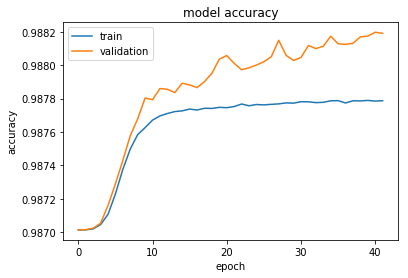

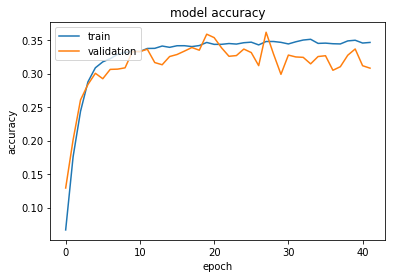

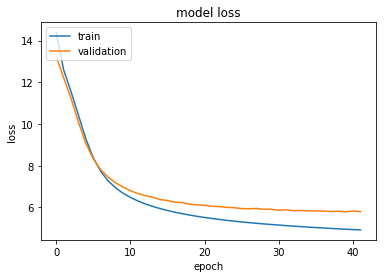

In [26]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#logistic regression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *
from keras.callbacks import *

#basic sequenctial keras NN model with 2 layers.
#Input are vectors of strategies that participate in the tournament
#Output is prediction of 1 hot vector representing the 3 most dominant strategies in the tournament
model2 = Sequential()

model2.add(Dense(units=231, activation='softmax', input_dim=3234))

model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['binary_accuracy', 'categorical_accuracy'])

history2 = model2.fit(np.array(x_train), np.array(y_train), 
                    validation_split=0.2, 
                    epochs=5000, 
                    verbose=1, 
                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')],
                    batch_size=50)

Train on 32979 samples, validate on 8245 samples
Epoch 1/5000
32979/32979 [==============================] - 11s 319us/step - loss: 14.1774 - binary_accuracy: 0.9870 - categorical_accuracy: 0.1397 - val_loss: 11.1800 - val_binary_accuracy: 0.9870 - val_categorical_accuracy: 0.2431
Epoch 2/5000
32979/32979 [==============================] - 8s 251us/step - loss: 9.7469 - binary_accuracy: 0.9871 - categorical_accuracy: 0.3083 - val_loss: 8.9443 - val_binary_accuracy: 0.9871 - val_categorical_accuracy: 0.3164
Epoch 3/5000
32979/32979 [==============================] - 9s 274us/step - loss: 8.1415 - binary_accuracy: 0.9871 - categorical_accuracy: 0.3432 - val_loss: 7.8774 - val_binary_accuracy: 0.9871 - val_categorical_accuracy: 0.3294
Epoch 4/5000
32979/32979 [==============================] - 7s 221us/step - loss: 7.2914 - binary_accuracy: 0.9871 - categorical_accuracy: 0.3544 - val_loss: 7.2521 - val_binary_accuracy: 0.9872 - val_categorical_accuracy: 0.3454
Epoch 5/5000
32979/32979 [==

In [ ]:
print(history2.history2.keys())
#  "Accuracy"
#  "Accuracy"
plt.plot(history2.history['binary_accuracy'])
plt.plot(history2.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#  "Accuracy"
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

y_pred2 = model2.predict(x_train[:n])

top_k_in_k(y_true, y_pred2)

model2.save('logis_model_v1.h5')